<a href="https://colab.research.google.com/github/Laureoby/Air_Quality_dataset/blob/update/Air_Quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('/content/drive/MyDrive/Air_Quality.csv')
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


**Data** **cleaning**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [ ]:
data['Message'].unique()

array([nan])

In [68]:
#First, we delete Message column
data = data.drop(['Unique ID', 'Message'], axis=1)

In [69]:
data.isnull().sum()

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       9
Geo Place Name    9
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [70]:
#I think we can just remove these lines because it's small
data = data.dropna(subset=['Geo Join ID'])
data.isnull().sum()

Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [71]:
#We work on Time Period column
#Define a function to extract the year
def extract_year(time_period):
    if '-' in time_period:
        # This handles ranges by taking the first year
        return time_period.split('-')[0]
    else:
        # This extracts the last four digits which typically represent the year
        return ''.join(filter(str.isdigit, time_period[-4:]))

In [72]:
#Define a function to extract the season
def extract_season(time_period):
    seasons = ['Summer', 'Winter', 'Spring', 'Autumn', 'Annual Average', '2-Year Summer Average']
    for season in seasons:
        if season in time_period:
            return season
    return 'Annual'  # Default if no season is specifically mentioned

In [73]:
#Apply these functions to create new columns
data['Year'] = data['Time Period'].apply(extract_year)
data['Season'] = data['Time Period'].apply(extract_season)

#Now we drop Time Period column
data = data.drop(['Time Period'], axis=1)
data

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,01/01/2015,0.3,2015,Annual
1,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,01/01/2015,1.2,2015,Annual
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual Average
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,12/01/2011,8.0,2012,Annual Average
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,06/01/2022,6.1,2022,Summer
...,...,...,...,...,...,...,...,...,...,...,...
18020,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),01/01/2019,12.9,2019,Annual
18021,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),01/01/2010,14.7,2010,Annual
18022,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,01/01/2010,43.4,2010,Annual
18023,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,01/01/2010,65.8,2010,Annual


**Data visualization**

As a data analyst, I want to analyze the average boiler emissions and fine particles (PM 2.5) levels across different geographical areas so that I can identify regions with the highest and lowest levels of air pollution. purpose me a code to do that

In [ ]:
# Filter the data to include only rows where 'Name' is 'Fine particles (PM 2.5)'
filtered_data = data[data['Name'] == 'Fine particles (PM 2.5)']
#Count values
count_data = filtered_data['Geo Place Name'].value_counts().reset_index()
count_data.columns = ['Geo Place Name', 'Count']
# Displaying the result
filtered_data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual Average
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,12/01/2011,8.0,2012,Annual Average
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,06/01/2022,6.1,2022,Summer
5,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,06/01/2012,10.0,2012,Summer
6,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,06/01/2013,9.8,2013,Summer


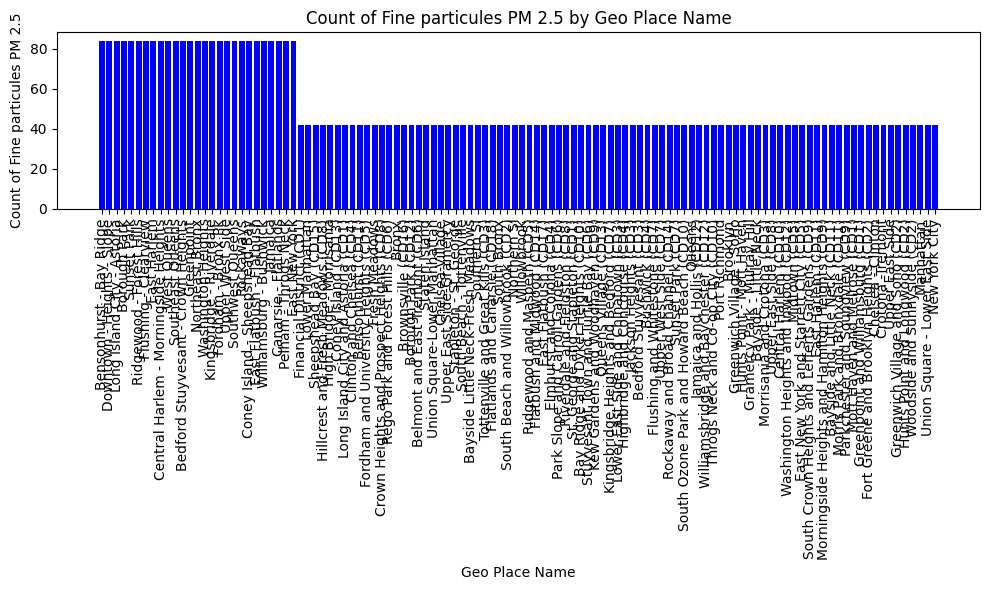

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(count_data['Geo Place Name'], count_data['Count'], color='blue')
plt.xlabel('Geo Place Name')
plt.ylabel('Count of Fine particules PM 2.5')
plt.title('Count of Fine particules PM 2.5 by Geo Place Name')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis to make them more readable
plt.tight_layout()
plt.show()

As a public health researcher, I want to compare the changes in fine particles (PM 2.5) levels between different time periods in the same geographical location so that I can understand trends in air quality over time.

<ipython-input-16-68fa70fdc3c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_geo_data['PM2.5'] = filtered_data['Name'].str.extract('(\d+)').astype(float)


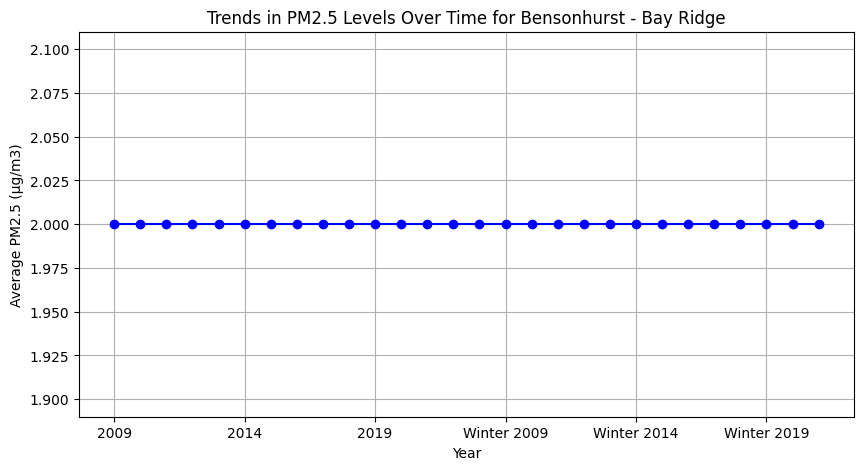

In [ ]:
# Specify the location
specific_location = 'Bensonhurst - Bay Ridge'
# Filter data for specific location and PM2.5 values
filtered_geo_data = filtered_data[(filtered_data['Geo Place Name'] == specific_location) & filtered_data['Name']]
# Extract numeric values from 'Name' column
filtered_geo_data['PM2.5'] = filtered_data['Name'].str.extract('(\d+)').astype(float)
# Group by Time Period and calculate mean for PM2.5 values
time_series_data = filtered_geo_data.groupby('Year')['PM2.5'].mean()

# Plotting
plt.figure(figsize=(10, 5))
time_series_data.plot(kind='line', marker='o', color='b')
plt.title(f'Trends in PM2.5 Levels Over Time for {specific_location}')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (μg/m3)')
plt.grid(True)
plt.show()

As a data scientist, I want to visualize the distribution of boiler emissions and fine particles (PM 2.5) data values to identify any outliers or anomalies that might require further investigation

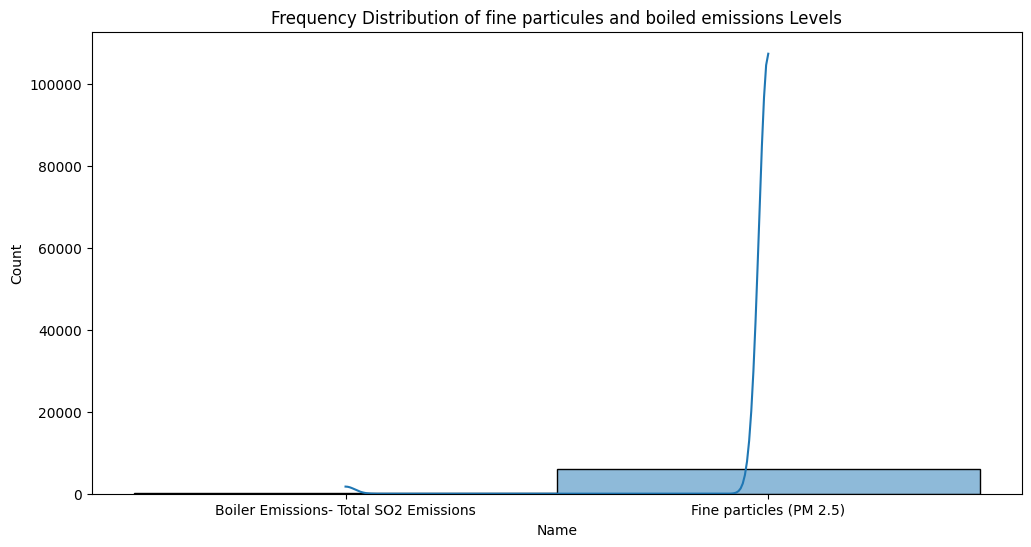

In [ ]:
# Filter the data to include only rows where 'Name' is either 'Fine particles (PM 2.5)' or 'Boiler Emissions- Total SO2 Emissions'
filtered_name = data[data['Name'].isin(['Fine particles (PM 2.5)', 'Boiler Emissions- Total SO2 Emissions'])]

#show histogram
plt.figure(figsize=(12, 6))
sns.histplot(filtered_name['Name'], kde=True, bins=30)
plt.title('Frequency Distribution of fine particules and boiled emissions Levels')
plt.show()

As a city planner, I want to map the data to visualize air pollution levels in different neighborhoods over the years so that I can identify areas that need targeted interventions for air quality improvement

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
geolocator = Nominatim(user_agent="obyApp")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # 1 second delay between requests

In [ ]:
def get_location(row):
    try:
        location = geocode(row['Geo Place Name'])
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Apply the function and create the new columns
data[['latitude', 'longitude']] = data.apply(get_location, axis=1)

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
  File "/usr/lib/python3.10/http/client.py", line 1375, in getresponse
    response.begin()
  File "/usr/lib/python3.10/http/client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.10/http/client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.10/ssl.py", line 1159, in read
    return self._sslobj.read(len, buffer)
TimeoutError: The read operation timed out

The above e

In [ ]:
data.to_csv('updated_data.csv', index=False)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.longitude, data.latitude)
)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Data Value', ax=ax, legend=True,
         legend_kwds={'label': "Level of Pollution"},
         cmap='viridis')  # Use an appropriate colormap
plt.title('Air Pollution Levels by Neighborhood Over Years')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(gdf,
                        lat='latitude',
                        lon='longitude',
                        color='Data Value',
                        size='Data Value',
                        hover_name='neighborhood',
                        hover_data=['Time Period', 'Data Value'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

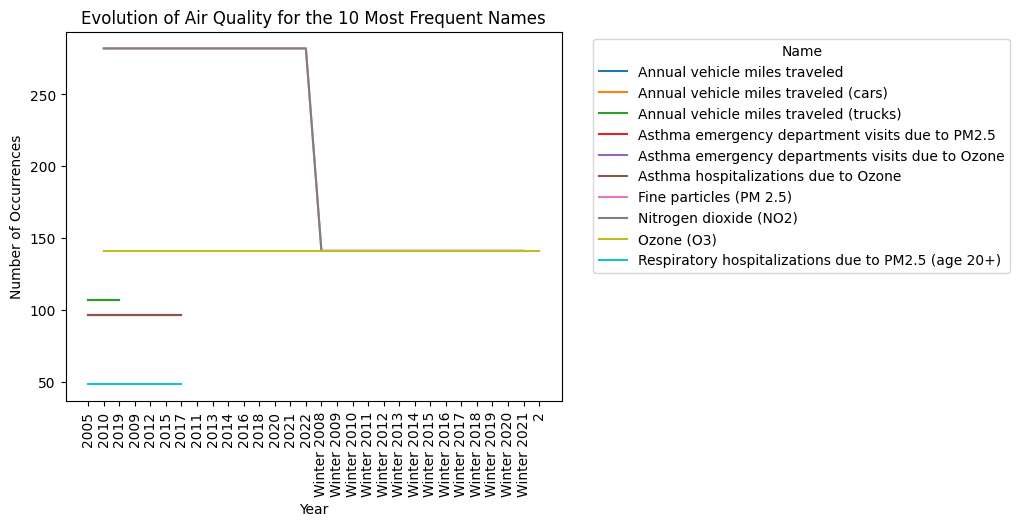

In [ ]:
# Get the top 10 most frequent names
top_names = data['Name'].value_counts().head(10).index

# Group by 'Name' and 'Year' and count occurrences
yearly_name_ratings = data.groupby(['Name', 'Year']).size().reset_index(name='Counts')

# Filter data to include only the top names
filtered_yearly_name_ratings = yearly_name_ratings[yearly_name_ratings['Name'].isin(top_names)]

# Create a line plot
sns.lineplot(data=filtered_yearly_name_ratings, x='Year', y='Counts', hue='Name', palette='tab10')

# Add legend and title
plt.title("Evolution of Air Quality for the 10 Most Frequent Names")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.show()


#**Dataset preparation**

In [74]:
data.dtypes

Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Start_Date         object
Data Value        float64
Year               object
Season             object
dtype: object

In [75]:
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
0,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,01/01/2015,0.3,2015,Annual
1,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,01/01/2015,1.2,2015,Annual
2,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,12/01/2011,8.6,2012,Annual Average
3,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,12/01/2011,8.0,2012,Annual Average
4,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,06/01/2022,6.1,2022,Summer


In [76]:
# prompt: use labelEncoder for column Name, Measure, Geo Type Name, Geo Place Name and Season
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the categorical columns
data['Name'] = le.fit_transform(data['Name'])
data['Measure'] = le.fit_transform(data['Measure'])
data['Geo Type Name'] = le.fit_transform(data['Geo Type Name'])
data['Geo Place Name'] = le.fit_transform(data['Geo Place Name'])
data['Season'] = le.fit_transform(data['Season'])
data['Measure Info']=le.fit_transform(data['Measure Info'])
# Print the transformed data
data.dtypes

Indicator ID        int64
Name                int64
Measure             int64
Measure Info        int64
Geo Type Name       int64
Geo Join ID       float64
Geo Place Name      int64
Start_Date         object
Data Value        float64
Year               object
Season              int64
dtype: object

In [77]:
data['Year'].unique()

array(['2015', '2012', '2022', '2013', '2021', '2017', '2009', '2016',
       '2011', 'Winter 2021', 'Winter 2010', 'Winter 2014', 'Winter 2015',
       '2018', '2014', '2010', 'Winter 2020', 'Winter 2019',
       'Winter 2012', '2019', '2020', 'Winter 2018', 'Winter 2017',
       'Winter 2008', '2005', 'Winter 2013', 'Winter 2009', 'Winter 2011',
       'Winter 2016', '2'], dtype=object)

In [78]:
# Fonction pour nettoyer et convertir la colonne Year
def clean_and_convert_year(data):
    # Supprimer 'Winter ' de la colonne Year et convertir le reste en entier
    data['Year'] = data['Year'].str.replace('Winter ', '').astype(int)
    return data

# Appliquer la fonction au dataframe
data = clean_and_convert_year(data)
data['Year'].unique()

array([2015, 2012, 2022, 2013, 2021, 2017, 2009, 2016, 2011, 2010, 2014,
       2018, 2020, 2019, 2008, 2005,    2])

In [79]:
data['Year'].value_counts().get(2)

141

In [80]:
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
0,640,8,7,1,4,409.0,89,01/01/2015,0.3,2015,0
1,640,8,7,1,4,209.0,8,01/01/2015,1.2,2015,0
2,365,12,5,0,4,209.0,8,12/01/2011,8.6,2012,1
3,365,12,5,0,4,409.0,89,12/01/2011,8.0,2012,1
4,365,12,5,0,4,409.0,89,06/01/2022,6.1,2022,2


In [81]:
mode_value = data['Year'].mode().values[0]
data['Year'] = data['Year'].replace(2, mode_value)

In [82]:
data['Year'].value_counts().get(2)

In [83]:
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Start_Date,Data Value,Year,Season
0,640,8,7,1,4,409.0,89,01/01/2015,0.3,2015,0
1,640,8,7,1,4,209.0,8,01/01/2015,1.2,2015,0
2,365,12,5,0,4,209.0,8,12/01/2011,8.6,2012,1
3,365,12,5,0,4,409.0,89,12/01/2011,8.0,2012,1
4,365,12,5,0,4,409.0,89,06/01/2022,6.1,2022,2


In [85]:
data['Start_Date'].unique()

array(['01/01/2015', '12/01/2011', '06/01/2022', '06/01/2012',
       '06/01/2013', '06/01/2021', '12/01/2012', '01/01/2017',
       '06/01/2009', '01/01/2013', '06/01/2016', '06/01/2011',
       '12/31/2015', '12/01/2021', '12/01/2010', '01/01/2021',
       '12/01/2014', '12/01/2015', '01/01/2018', '06/01/2014',
       '12/01/2008', '06/01/2010', '12/01/2020', '12/01/2019',
       '06/01/2015', '01/01/2009', '12/01/2009', '06/01/2019',
       '01/01/2020', '12/01/2018', '01/02/2012', '01/01/2019',
       '12/01/2017', '01/01/2022', '01/01/2005', '12/01/2013',
       '01/01/2010', '06/01/2017', '06/01/2020', '06/01/2018',
       '12/01/2016', '01/01/2014', '01/01/2011'], dtype=object)

In [86]:
# Convertir les chaînes de date en datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'], format='%m/%d/%Y')

# Extraire l'année, le mois et le jour
data['Start_Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month
data['Day'] = data['Start_Date'].dt.day

# Supprimer la colonne originale de date si nécessaire
data.drop('Start_Date', axis=1, inplace=True)

In [88]:
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Year,Season,Start_Year,Month,Day
0,640,8,7,1,4,409.0,89,0.3,2015,0,2015,1,1
1,640,8,7,1,4,209.0,8,1.2,2015,0,2015,1,1
2,365,12,5,0,4,209.0,8,8.6,2012,1,2011,12,1
3,365,12,5,0,4,409.0,89,8.0,2012,1,2011,12,1
4,365,12,5,0,4,409.0,89,6.1,2022,2,2022,6,1


In [90]:
data.drop('Year', axis=1, inplace=True)
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Season,Start_Year,Month,Day
0,640,8,7,1,4,409.0,89,0.3,0,2015,1,1
1,640,8,7,1,4,209.0,8,1.2,0,2015,1,1
2,365,12,5,0,4,209.0,8,8.6,1,2011,12,1
3,365,12,5,0,4,409.0,89,8.0,1,2011,12,1
4,365,12,5,0,4,409.0,89,6.1,2,2022,6,1


In [91]:
data = data.rename(columns={"Start_Year": "Year"})
data.head()

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Season,Year,Month,Day
0,640,8,7,1,4,409.0,89,0.3,0,2015,1,1
1,640,8,7,1,4,209.0,8,1.2,0,2015,1,1
2,365,12,5,0,4,209.0,8,8.6,1,2011,12,1
3,365,12,5,0,4,409.0,89,8.0,1,2011,12,1
4,365,12,5,0,4,409.0,89,6.1,2,2022,6,1


In [92]:
corr=data.corr()
corr

,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,Season,Year,Month,Day
Indicator ID,1.000000,-0.706335,-0.551933,0.106145,0.232123,-0.040888,-0.001681,0.336341,-0.782259,-0.317617,-0.642359,-0.057034
Name,-0.706335,1.000000,0.020760,0.151404,-0.117419,0.029617,0.001780,-0.372803,0.566637,0.223300,0.416609,0.023467
Measure,-0.551933,0.020760,1.000000,-0.055113,-0.203264,0.022213,0.000058,0.044518,0.424966,0.207377,0.345351,0.024398
Measure Info,0.106145,0.151404,-0.055113,1.000000,-0.021619,-0.002501,-0.000500,0.270573,-0.047856,-0.035662,-0.092072,-0.026172
Geo Type Name,0.232123,-0.117419,-0.203264,-0.021619,1.000000,0.025247,0.026468,0.062547,-0.180270,-0.068863,-0.146497,-0.010550
Geo Join ID,-0.040888,0.029617,0.022213,-0.002501,0.025247,1.000000,0.067249,-0.011104,0.032107,0.013032,0.026092,0.002241
Geo Place Name,-0.001681,0.001780,0.000058,-0.000500,0.026468,0.067249,1.000000,-0.028546,0.001342,0.000593,0.001091,0.000116
Data Value,0.336341,-0.372803,0.044518,0.270573,0.062547,-0.011104,-0.028546,1.000000,-0.225859,-0.178411,-0.185551,-0.035051
Season,-0.782259,0.566637,0.424966,-0.047856,-0.180270,0.032107,0.001342,-0.225859,1.000000,0.226525,0.751304,-0.075421
Year,-0.317617,0.223300,0.207377,-0.035662,-0.068863,0.013032,0.000593,-0.178411,0.226525,1.000000,-0.060492,0.017794


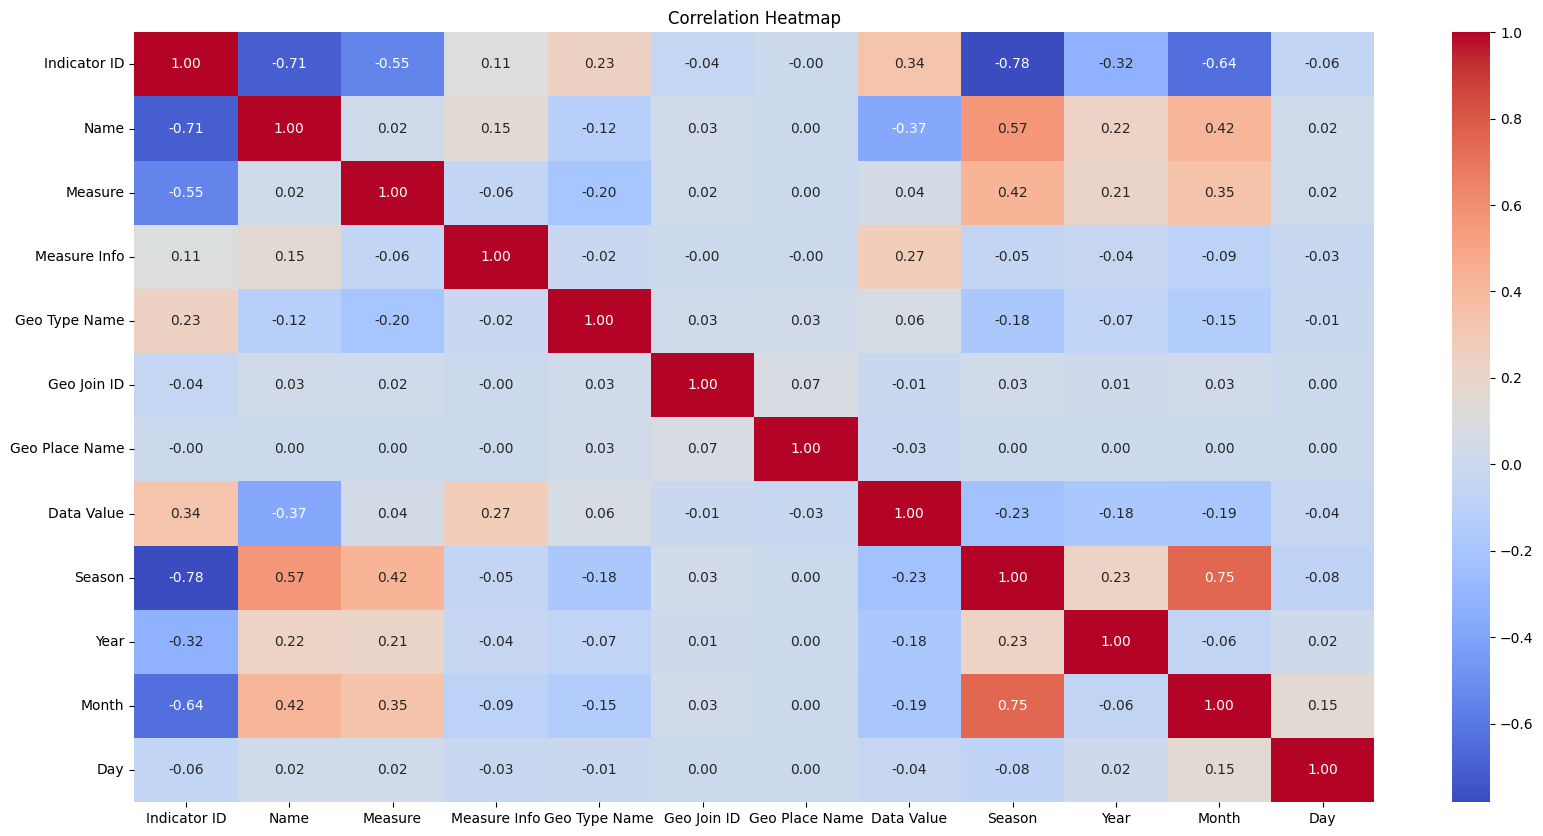

In [93]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title and show the plot
plt.title('Correlation Heatmap')
plt.show()

#**Divide into train and test**

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Name', axis=1), data['Name'], test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (14412, 11)
Shape of X_test: (3604, 11)
Shape of y_train: (14412,)
Shape of y_test: (3604,)


#**Training model**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#We apply three algorith Linear regression, KNN, Decision tree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42),
    'GaussianNB':GaussianNB()
}

#precision function
def precision_function(Y_true, Y_pred, retu=False):
    acc=accuracy_score(Y_true, Y_pred)
    if retu:
        return acc
    else:
        print(f'Precision of model is: {acc}')

#evaluation model
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, Y_train)
        precision_function(Y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression:
Precision of model is: 0.33490566037735847
------------------------------
KNeighborsClassifier:
Precision of model is: 0.8842952275249722
------------------------------
DecisionTreeClassifier:
Precision of model is: 0.6600998890122086
------------------------------
GaussianNB:
Precision of model is: 0.05965593784683685
------------------------------


In [97]:
X = data.drop('Name', axis=1)
y = data['Name']

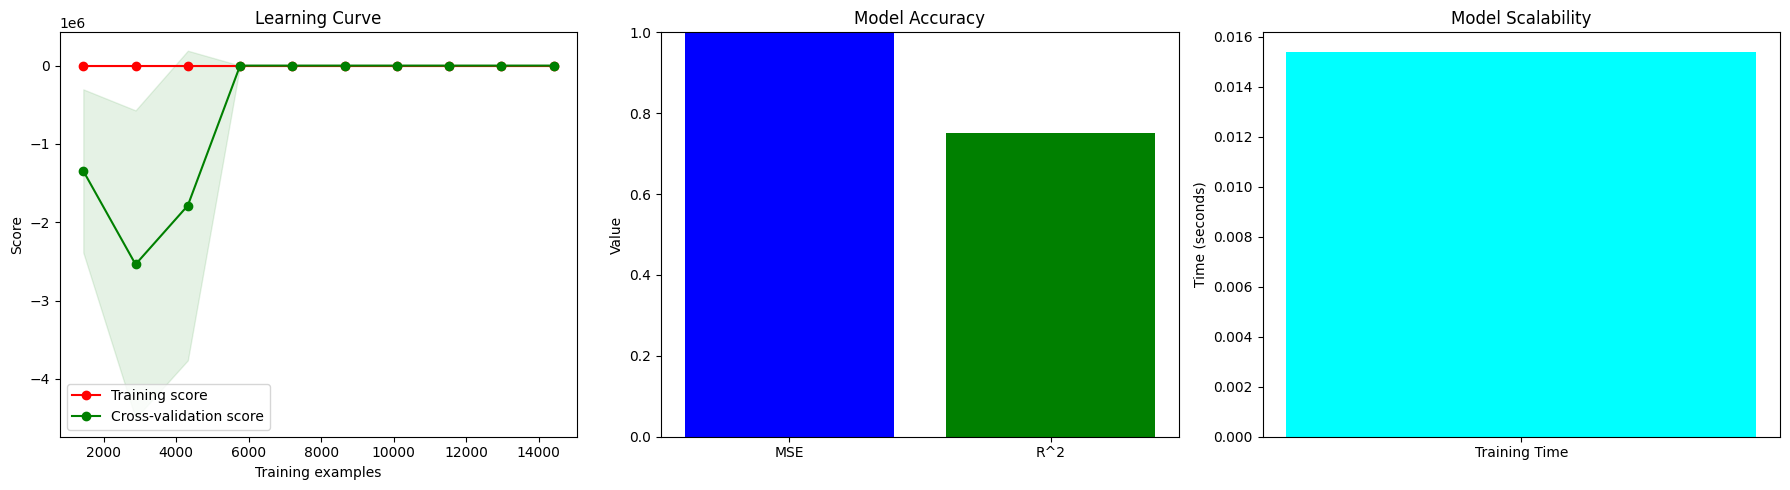

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from time import time

# Créer et entraîner le modèle LinearRegression
model = LinearRegression()
start_time = time()
model.fit(X_train, y_train)
training_time = time() - start_time

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Génération de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Création des subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Trois figures alignées horizontalement

# Courbe d'apprentissage
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axes[0].set_title("Learning Curve")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
axes[0].legend(loc="best")

# Précision du modèle
axes[1].bar(['MSE', 'R^2'], [mse, r2], color=['blue', 'green'])
axes[1].set_title("Model Accuracy")
axes[1].set_ylim(0, 1 if r2 <= 1 else r2 + 0.1)
axes[1].set_ylabel("Value")

# Scalabilité
axes[2].bar(['Training Time'], [training_time], color='cyan')
axes[2].set_title("Model Scalability")
axes[2].set_ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [100]:
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return (e)
def ConfusionmatrixPlot(Ytrue,Ypred):

    cm = metrics.confusion_matrix(Ytrue,Ypred)
    from IPython.display import Image, display

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
                ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    plt.show()
def ROCCURVE(predict,ytrue,ypred):
    fpr,tpr, thresolds=metrics.roc_curve(ytest,predict)
    roc_auc=metrics.auc(fpr,tpr)
    print("the Area under the ROC curve:%f" %roc_auc)

    #plotting the ROC curve
    plt.plot(fpr,tpr,label="AUC = %0.2f" %roc_auc)
    plt.xlabel('false Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="lower right")
    plt.title('Receiver operating characteristics')

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [102]:
def training(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc_ovr',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [103]:
def training_svm(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [104]:
def plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=None):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    path= title
    plt.savefig(path)

    plt.show()

**Logistic regression**

In [105]:
title = "Learning Curves (Logistic Regression)"
cv =KFold(10,shuffle=True,random_state=28)
estimator = OneVsRestClassifier(LogisticRegression())
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  162  4175  8188 12201 16214]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


In [106]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [107]:
train_scores_mean+train_scores_std

array([1.0021511 , 0.95090025, 0.95377227, 0.96290247, 0.94950158])

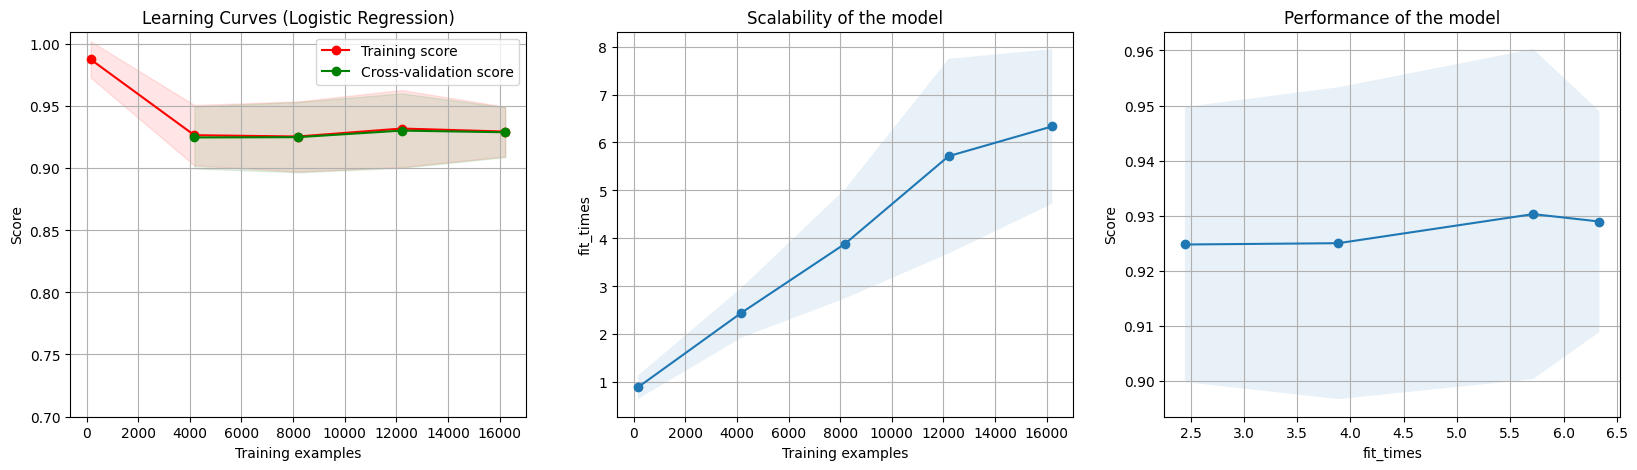

In [108]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

**Gaussian Naive Bayes**

In [109]:
title1 = "Learning Curves (Gaussian Naive Bayes)"
cv1 =KFold(10,shuffle=True,random_state=28)
estimator1 = OneVsRestClassifier(GaussianNB())
train_sizes1, train_scores1, test_scores1,fit_times1= training(estimator1, X, y, cv=cv1, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  162  4175  8188 12201 16214]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.2s finished


In [110]:
train_scores_mean1 = train_scores1.mean(axis=1)
train_scores_std1 = train_scores1.std(axis=1)

test_scores_mean1 = test_scores1.mean(axis=1)
test_scores_std1= test_scores1.std(axis=1)

fit_times_mean1 = fit_times1.mean(axis=1)
fit_times_std1 = fit_times1.std(axis=1)

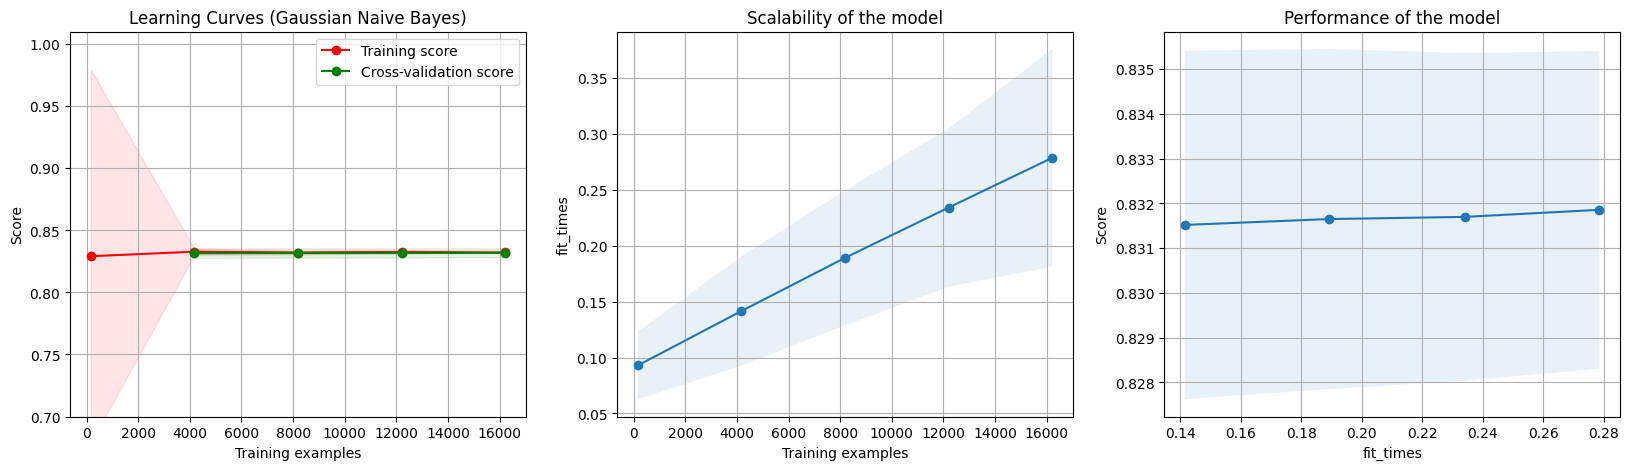

In [111]:
plot_training(train_sizes1,train_scores_mean1,train_scores_std1,test_scores_mean1,test_scores_std1,fit_times_mean1,fit_times_std1,title1,ylim=(0.7, 1.01))

**SVM**

In [112]:
title3 = "Learning Curves (NEURAL NETWORK)"
cv3 =KFold(10,shuffle=True,random_state=28)
estimator3 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(12,),
                                                 activation='relu',
                                                 solver='adam',
                                                 alpha = 0.0001,
                                                 batch_size= 'auto',
                                                 learning_rate= 'constant',
                                                 learning_rate_init= 0.001,
                                                 power_t= 0.5,
                                                 max_iter= 1000,
                                                 shuffle= True,
                                                 random_state= None,
                                                 tol= 0.0001,
                                                 verbose= True)
train_sizes3, train_scores3, test_scores3,fit_times3= training(estimator3, X, Y, cv=cv3, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  162  4175  8188 12201 16214]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


In [113]:
train_scores_mean3 = train_scores3.mean(axis=1)
train_scores_std3 = train_scores3.std(axis=1)

test_scores_mean3 = test_scores3.mean(axis=1)
test_scores_std3= test_scores3.std(axis=1)

fit_times_mean3 = fit_times3.mean(axis=1)
fit_times_std3 = fit_times3.std(axis=1)

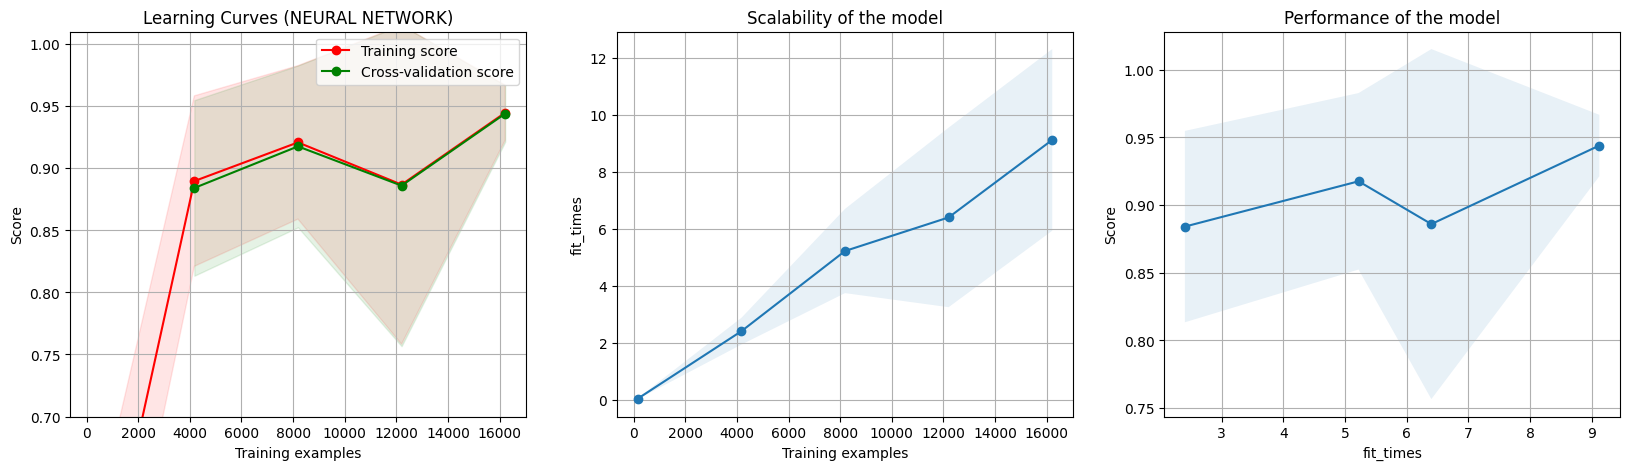

In [114]:
plot_training(train_sizes3,train_scores_mean3,train_scores_std3,test_scores_mean3,test_scores_std3,fit_times_mean3,fit_times_std3,title3,ylim=(0.7, 1.01))